In [1]:
# Import required dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# # Configure matplotlib
# plt.rcParams.update({
#     "pgf.texsystem": "pdflatex",
#     'font.family': 'serif',
#     'text.usetex': True,
#     'pgf.rcfonts': False,
# })
# plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.cm.Set1(np.linspace(0, 1, 10)))

# constants
FIGURE_SAVE_LOCATION = "../data/figures/04design/"
FIGURE_PREFILE = "bo_"

/var/folders/y0/2k6mgl4x5_db4cbjlvjsc0jw0000gn/T/ipykernel_75582/3572026255.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['inv_rho'].replace([np.inf, -np.inf], np.nan, inplace=True)
/var/folders/y0/2k6mgl4x5_db4cbjlvjsc0jw0000gn/T/ipykernel_75582/3572026255.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are set

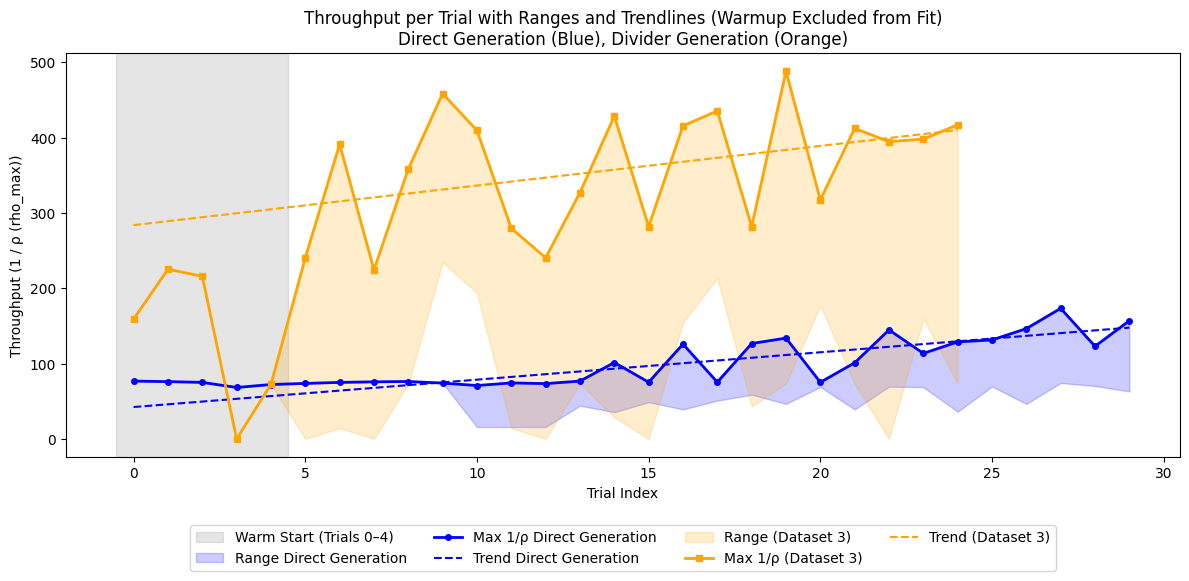

In [2]:


# Load Direct Generation, 3, 6, and 7
df2 = pd.read_csv('../data/scratch/bo/gpu_island_scheduler_results.csv')
df3 = pd.read_csv('../data/scratch/bo/gpu_island_scheduler_results_2.csv')
df6 = pd.read_csv('../data/scratch/bo/gpu_island_scheduler_results_3.csv')
df7 = pd.read_csv('../data/scratch/bo/gpu_island_scheduler_results_4.csv')

# Compute reciprocal rho_max for each dataset and handle infinities
for df in [df2, df3, df6, df7]:
    df['inv_rho'] = 1 / df['rho_max']
    df['inv_rho'].replace([np.inf, -np.inf], np.nan, inplace=True)

# Compute min and max for each trial for each dataset (for fill_between)
stats2_all = df2.groupby('trial_index')['inv_rho'].agg(['min', 'max']).reset_index()
stats3_all = df3.groupby('trial_index')['inv_rho'].agg(['min', 'max']).reset_index()
stats6_all = df6.groupby('trial_index')['inv_rho'].agg(['min', 'max']).reset_index()
stats7_all = df7.groupby('trial_index')['inv_rho'].agg(['min', 'max']).reset_index()

# Compute max_inv (best) for each trial for each dataset (for line)
max_inv2_all = df2.groupby('trial_index')['inv_rho'].max().reset_index()
max_inv3_all = df3.groupby('trial_index')['inv_rho'].max().reset_index()
max_inv6_all = df6.groupby('trial_index')['inv_rho'].max().reset_index()
max_inv7_all = df7.groupby('trial_index')['inv_rho'].max().reset_index()

# Filter out warmup (first five trials) for trend fitting
max_inv2_fit = max_inv2_all[max_inv2_all['trial_index'] >= 5]
max_inv3_fit = max_inv3_all[max_inv3_all['trial_index'] >= 5]
max_inv6_fit = max_inv6_all[max_inv6_all['trial_index'] >= 5]
max_inv7_fit = max_inv7_all[max_inv7_all['trial_index'] >= 5]

# Fit linear trendlines on filtered data
coeffs2 = np.polyfit(max_inv2_fit['trial_index'], max_inv2_fit['inv_rho'], 1)
coeffs3 = np.polyfit(max_inv3_fit['trial_index'], max_inv3_fit['inv_rho'], 1)
coeffs6 = np.polyfit(max_inv6_fit['trial_index'], max_inv6_fit['inv_rho'], 1)
coeffs7 = np.polyfit(max_inv7_fit['trial_index'], max_inv7_fit['inv_rho'], 1)

# Generate fitted values over full range of trial indices
x2 = max_inv2_all['trial_index'].to_numpy()
fit2 = np.polyval(coeffs2, x2)
x3 = max_inv3_all['trial_index'].to_numpy()
fit3 = np.polyval(coeffs3, x3)
x6 = max_inv6_all['trial_index'].to_numpy()
fit6 = np.polyval(coeffs6, x6)
x7 = max_inv7_all['trial_index'].to_numpy()
fit7 = np.polyval(coeffs7, x7)

# Create plot
plt.figure(figsize=(12, 6))

# Shade the first five trial indices (0 through 4) for warm start
plt.axvspan(-0.5, 4.5, color='gray', alpha=0.2, label='Warm Start (Trials 0–4)')

# Plot fill_between for dataset 2 (blue)
plt.fill_between(stats2_all['trial_index'].to_numpy(), stats2_all['min'].to_numpy(), stats2_all['max'].to_numpy(),
                 color='blue', alpha=0.2, label='Range Direct Generation')
plt.plot(max_inv2_all['trial_index'].to_numpy(), max_inv2_all['inv_rho'].to_numpy(), color='blue', marker='o',
         linestyle='-', linewidth=2, markersize=4, label='Max 1/ρ Direct Generation')
plt.plot(x2, fit2, color='blue', linestyle='--', linewidth=1.5, label='Trend Direct Generation')

# Plot fill_between for dataset 3 (orange)
plt.fill_between(stats3_all['trial_index'].to_numpy(), stats3_all['min'].to_numpy(), stats3_all['max'].to_numpy(),
                 color='orange', alpha=0.2, label='Range (Dataset 3)')
plt.plot(max_inv3_all['trial_index'].to_numpy(), max_inv3_all['inv_rho'].to_numpy(), color='orange', marker='s',
         linestyle='-', linewidth=2, markersize=4, label='Max 1/ρ (Dataset 3)')
plt.plot(x3, fit3, color='orange', linestyle='--', linewidth=1.5, label='Trend (Dataset 3)')

# # Plot fill_between for Divider Generation (purple)
# plt.fill_between(stats6_all['trial_index'].to_numpy(), stats6_all['min'].to_numpy(), stats6_all['max'].to_numpy(),
#                  color='purple', alpha=0.2, label='Range (Divider Generation)')
# plt.plot(max_inv6_all['trial_index'].to_numpy(), max_inv6_all['inv_rho'].to_numpy(), color='purple', marker='D',
#          linestyle='-', linewidth=2, markersize=4, label='Max 1/ρ (Divider Generation)')
# plt.plot(x6, fit6, color='purple', linestyle='--', linewidth=1.5, label='Trend (Divider Generation)')

# # Plot fill_between for dataset 7 (brown)
# plt.fill_between(stats7_all['trial_index'].to_numpy(), stats7_all['min'].to_numpy(), stats7_all['max'].to_numpy(),
#                  color='brown', alpha=0.2, label='Range (Dataset 7)')
# plt.plot(max_inv7_all['trial_index'].to_numpy(), max_inv7_all['inv_rho'].to_numpy(), color='brown', marker='X',
#          linestyle='-', linewidth=2, markersize=4, label='Max 1/ρ (Dataset 7)')
# plt.plot(x7, fit7, color='brown', linestyle='--', linewidth=1.5, label='Trend (Dataset 7)')

# Labels and title
plt.xlabel('Trial Index')
plt.ylabel('Throughput (1 / ρ (rho_max))')
plt.title('Throughput per Trial with Ranges and Trendlines (Warmup Excluded from Fit)\nDirect Generation (Blue), Divider Generation (Orange)')

# Place legend below the plot
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=4)

plt.tight_layout()
plt.savefig(FIGURE_SAVE_LOCATION + FIGURE_PREFILE + 'demo.pdf', bbox_inches='tight')